In [1]:
import numpy as np
import tensorflow as tf


from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Dense,
    LSTM,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Reshape,
    Dropout,
    concatenate,
    GlobalMaxPooling1D,
    Lambda,
)
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [35]:
import pywt
wavelet = pywt.Wavelet("db1")

In [43]:
def wavelet_func(x):
    return pywt.dwt(x, wavelet=wavelet, mode="periodic", axis=-1)


def make_model(x_input, filter_size: int = 5, wavelet: bool = False):
    x = Input(shape=(x_input.shape[1], x_input.shape[2],), name="window_input")

    if filter_size > 3:
        print("hey")
    # cnn_in = Lambda(wavelet_layer)(x)
#     cA, cD = pywt.dwt(data_in, wavelet=wavelet, mode="periodic", axis=-1)
#     waveout = tf.keras.backend.map_fn(wavelet_func, x)
#     wavelet_vals = Lambda(lambda v: pywt.dwt(v, wavelet=wavelet, mode="periodic", axis=-1))(x)
    cnn_out = Dense(100)(x[0: 100])

    cnn_out = Conv1D(filters=filter_size, kernel_size=4, activation="relu", padding="causal", dilation_rate=2)(cnn_out)
    cnn_out = MaxPooling1D()(cnn_out)
    cnn_out = Conv1D(filters=filter_size * 2, kernel_size=4, activation="relu", padding="causal", dilation_rate=4)(cnn_out)
    cnn_out = MaxPooling1D()(cnn_out)
    cnn_out = Conv1D(filters=filter_size * 3, kernel_size=4, activation="relu", padding="causal", dilation_rate=8)(cnn_out)
    cnn_out = MaxPooling1D()(cnn_out)
    cnn_out = Conv1D(filters=filter_size * 4, kernel_size=4, activation="relu", padding="causal", dilation_rate=16)(cnn_out)
    cnn_out = GlobalMaxPooling1D()(cnn_out)

    # # Non time-window input
    # lstm_input = Input(shape=(x_input.shape[1], x_input.shape[2],), name='full_input')
    lstm_out = LSTM(64, return_sequences=True)(x)
    lstm_out = LSTM(64)(lstm_out)

    # Concat LSTM out and y
    y = concatenate([lstm_out, cnn_out])
    y = Dropout(0.2)(y)
    y = Dense(64, activation="sigmoid")(y)
    output = Dense(1, activation="sigmoid", name="main_output")(y)

    model = Model(inputs=x, outputs=output, name="cnn_lstm_model")
    return model
x_input = np.zeros([10, 10, 10])
model = make_model(x_input=x_input)

hey


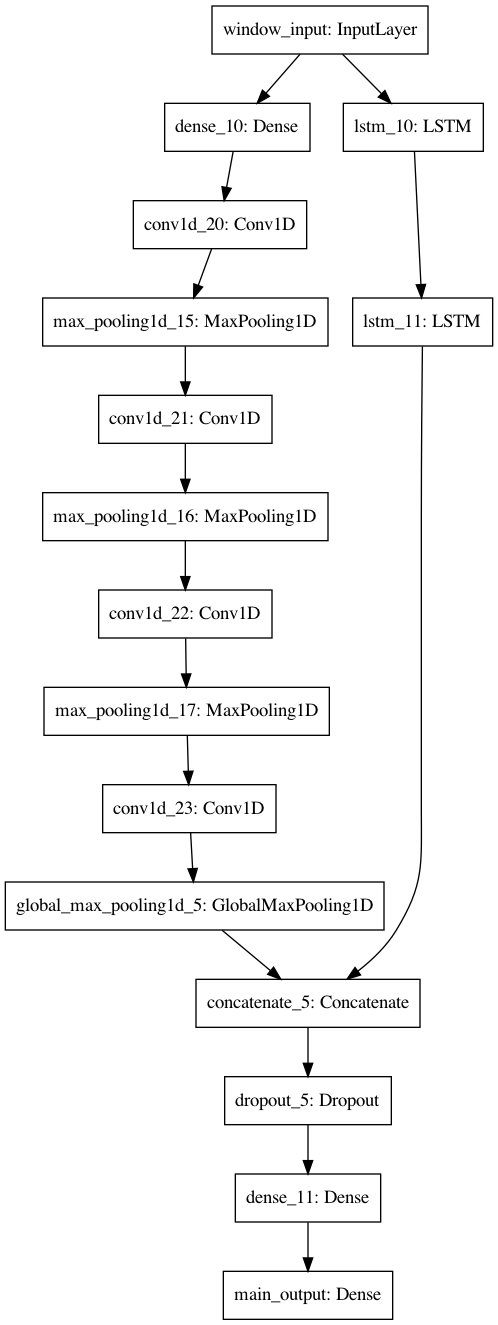

In [42]:
tf.keras.utils.plot_model(model)

In [16]:
filter_size = 5

class Falcon(tf.keras.Model):

    def __init__(self):
        super(Falcon, self).__init__()
        self.dense_1 = Dense(100)
        self.conv1d_1 = Conv1D(filters=filter_size, kernel_size=4, activation="relu")
        self.maxpool_1 = GlobalMaxPooling1D()
        self.classifier = Dense(1, activation="sigmoid")

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.conv1d_1(x)
        x = self.maxpool_1(x)
        return self.classifier(x)



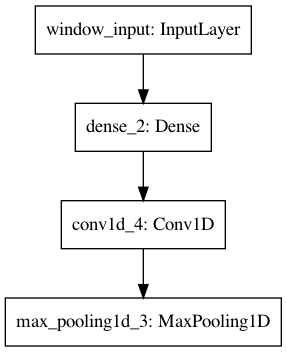

In [31]:
model2 = Model(inputs=model.input, outputs=model.layers[3].output)
tf.keras.utils.plot_model(model2)

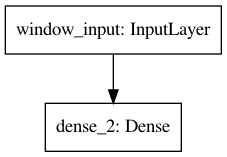

In [28]:
output = model2.predict(np.random.random([10, 10]))

In [30]:
output.flatten()

array([-4.45901379e-02,  1.02814279e-01, -8.07015151e-02, -6.13015711e-01,
       -1.36673182e-01, -1.57813564e-01, -1.52589306e-01,  1.45206926e-02,
        2.15498924e-01,  1.07409485e-01, -1.53610155e-01,  1.49143517e-01,
       -5.91716133e-02,  2.38716453e-01,  1.15565974e-02, -1.98789299e-01,
       -2.13050708e-01,  2.11235777e-01, -4.67898697e-02, -8.13664347e-02,
       -1.18296698e-01, -4.22352105e-02,  1.89170957e-01, -8.47679526e-02,
       -2.60942966e-01,  1.69609138e-03,  1.39957502e-01,  2.27090761e-01,
        3.00249189e-01, -1.47116050e-01,  4.25069660e-01,  2.12852478e-01,
       -2.23554596e-01,  7.08802640e-02, -1.75118580e-01,  1.48151908e-02,
        3.62445086e-01, -4.22144085e-02,  5.66501096e-02, -1.58334181e-01,
        9.28955302e-02, -4.03223597e-02,  6.45078570e-02,  1.58893000e-02,
        1.66144967e-01, -1.52047053e-01, -1.04042977e-01,  3.33386324e-02,
        4.62560123e-03, -4.70889099e-02, -9.33080092e-02, -1.03460729e-01,
       -2.94267982e-01,  